<a href="https://colab.research.google.com/github/KunalSingh-Physics/Crossmatching-astronomical-data/blob/main/Cross_Matching_Data_Catalogues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Cross Matching Astronomical Data:*



---

Kunal Singh 

Tanishka Manjrekar

Mounting Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Required Libraries:

In [ ]:
import time
import numpy as np
import pandas as pd
import gzip
import csv
import json
import pandas as pd
import collections
import operator
import matplotlib.pyplot as plt

# Defining Algorithms:

Defining Conversion Functions:

In [ ]:
def hms2dec(h,m,s):
  d=15*(h+(m/60)+(s/3600))
  return d
def dms2dec(d1,m1,s1):
  if d1>=0:
    deg=(float(abs(d1))+float((m1/60))+float((s1/3600)))
  elif d1<0:
    deg=-1*(float(abs(d1))+float((m1/60))+float((s1/3600)))
  return deg

## Importing data from catalogues


*   Brute Force
*   KD Tree



Brute Force

In [ ]:
def import_bss1():
  cat=np.loadtxt('/content/drive/Shareddrives/MSc 1 Sem 2/Astronomy and Astrophysics/bss.txt',usecols=range(1,7))
  cat=np.array(cat)
  n=1
  cn=[]
  for j in cat:
    
    ra=hms2dec(j[0],j[1],j[2])
    dec=dms2dec(j[3],j[4],j[5])
    new=(n,ra,dec)
    cn.append(new)
    n+=1
  return cn


def import_superfull1():
  k1=1
  k=[]
  cn=[]
  data = pd.read_csv('/content/drive/Shareddrives/MSc 1 Sem 2/Astronomy and Astrophysics/SCOS_XSC_mCl1_B21.5_R20_noStepWedges.csv.gz', nrows=500, compression='gzip',usecols=(1,2,3))
  ra = data['ra'].tolist()
  dec = data['dec'].tolist()
  bmag = data['Bmag'].tolist()
  for i in range(len(ra)):
    k1+=1
    k.append(k1)
    cn.append((k1,ra[i],dec[i]))
  return cn


Brute Force Algorithm

In [ ]:
def crossmatch(cat1, cat2, max_radius):
  def angular_dist(ra1,dec1,ra2,dec2):
    ra1=np.radians(ra1)
    ra2=np.radians(ra2)
    dec1=np.radians(dec1)
    dec2=np.radians(dec2)
    b=np.cos(dec1)*np.cos(dec2)*np.sin(np.abs(ra1-ra2)/2)**2
    a=np.sin(np.abs(dec1-dec2)/2)**2
    d=2*np.arcsin(np.sqrt(a+b))
    d=np.degrees(d)
    return d
  match = []
  no_match = []
  start = time.perf_counter()
  for id1, ra1, dec1 in cat1:
      closest_dist = np.inf
      closest_id2 = None
      for id2, ra2, dec2 in cat2:
          dist = angular_dist(ra1, dec1, ra2, dec2)
          if dist < closest_dist:
              closest_id2 = id2
              closest_dist = dist
      
      # Ignore match if it's outside the maximum radius
      if closest_dist > max_radius:
          no_match.append(id1)
      else:
          match.append((id1, closest_id2, closest_dist))
      time_taken = time.perf_counter() - start
  return match, no_match,time_taken


KD Tree

In [ ]:
def import_bss():
  cat=np.loadtxt('/content/drive/Shareddrives/MSc 1 Sem 2/Astronomy and Astrophysics/bss.txt',usecols=(1,2,3,4,5,6,8))       #Add more colums of the catalogue (till 10th col =flux)
  cat=np.array(cat)
  n=1
  cn=[]
  n_1=[]
  flux=[]
  for j in cat:
    
    ra=hms2dec(j[0],j[1],j[2])
    dec=dms2dec(j[3],j[4],j[5])
    flux.append(j[6])
    new=(ra,dec)
    n_1.append(n)
    cn.append(new)
    n+=1
  return [n_1,cn,flux]
  
def import_superfull(rows):
  k1=1
  k=[]
  cn=[]
  data = pd.read_csv('/content/drive/Shareddrives/MSc 1 Sem 2/Astronomy and Astrophysics/SCOS_XSC_mCl1_B21.5_R20_noStepWedges.csv.gz', nrows=rows, compression='gzip',usecols=(1,2,3))
  ra = data['ra'].tolist()
  dec = data['dec'].tolist()
  bmag = data['Bmag'].tolist()
  for i in range(len(ra)):
    k1+=1
    k.append(k1)
    cn.append((ra[i],dec[i]))
  return [k,cn,bmag]

def import_at20g():
  k1=1
  k=[]
  cn=[]
  data=pd.read_csv('/content/drive/Shareddrives/MSc 1 Sem 2/Astronomy and Astrophysics/AT20G_Full.csv',usecols=(1,2,3,5))       #Add more colums of the catalogue (till 10th col =flux)
  ra1 = data['ra'].tolist()
  dec1 = data['dec'].tolist()
  flux20hz = data['flux_1p5_cm'].tolist()
  flux8hz = data['flux_3p5_cm'].tolist()
  for i in range(len(ra1)):
    k1+=1
    k.append(k1)
    cn.append((ra1[i],dec1[i]))
  return [k,cn,flux20hz,flux8hz]

def import_sdss():
  k1=1
  k=[]
  cn=[]
  data = pd.read_csv('/content/drive/Shareddrives/MSc 1 Sem 2/Astronomy and Astrophysics/SDSS_big.csv',usecols=(1,2,3,4,5,6,7))
  ra = data['ra'].tolist()
  dec = data['dec'].tolist()
  u = data['u'].tolist()
  g = data['g'].tolist()
  r = data['r'].tolist()
  i = data['i'].tolist()
  z = data['z'].tolist()
  for j in range(len(ra)):
    k1+=1
    k.append(k1)
    cn.append((ra[j],dec[j]))
  return [k,cn,u,g,r,i,z]


KD Tree Algorithm

In [ ]:
#constructing a KD tree
BT = collections.namedtuple("BT", ["value", "left", "right"])
def kdtree(points):

    k = len(points[0])
    
    def build(*, points, depth):
        if len(points) == 0:
            return None
        
        points.sort(key=operator.itemgetter(depth % k))
        middle = len(points) // 2
        
        return BT(
            value = points[middle],
            left = build(
                points=points[:middle],
                depth=depth+1,
            ),
            right = build(
                points=points[middle+1:],
                depth=depth+1,
            ),
        )
    
    return build(points=list(points), depth=0)

NNRecord = collections.namedtuple("NNRecord", ["point", "distance"])

def find_nearest_neighbor(*, tree, point):
  def angular_dist(X,Y):
    ra1,dec1=X
    ra2,dec2=Y
    ra1=np.radians(ra1)
    ra2=np.radians(ra2)
    dec1=np.radians(dec1)
    dec2=np.radians(dec2)
    b=np.cos(dec1)*np.cos(dec2)*np.sin(np.abs(ra1-ra2)/2)**2
    a=np.sin(np.abs(dec1-dec2)/2)**2
    d=2*np.arcsin(np.sqrt(a+b))
    d=np.degrees(d)
    return d

  k = len(point)
  
  best = None
  def search(*, tree, depth):
      nonlocal best
      
      if tree is None:
          return
      
      distance = angular_dist(tree.value, point)
      if best is None or distance < best.distance:
          best = NNRecord(point=tree.value, distance=distance)
      
      axis = depth % k
      diff = point[axis] - tree.value[axis]
      if diff <= 0:
          close, away = tree.left, tree.right
      else:
          close, away = tree.right, tree.left
      
      search(tree=close, depth=depth+1)
      if diff**2 < best.distance:
          search(tree=away, depth=depth+1)
  
  search(tree=tree, depth=0)
  d3=angular_dist(best.point,point)
  return point,best.point,d3

def KD_CM(reference_points,query_points,d):
  max_dist=d/3600
  tree = kdtree(reference_points)
  query_new=[]
  reference_new=[]
  dist=[]
  start = time.perf_counter()
  for i in query_points:
    a,b,c=find_nearest_neighbor(tree=tree, point=i)
    if c<=max_dist:
      query_new.append(a)
      reference_new.append(b)
      dist.append(c)
  time_kd = time.perf_counter() - start
  print('Time taken for KD: ',time_kd)
  return reference_new,query_new,dist

# Time Complexity:

Calling Brute Force Algorithm

In [ ]:
bss_cat = import_bss1()
super_cat = import_superfull1()


max_dist = 1/3600
matches, no_matches,time1 = crossmatch(bss_cat, super_cat, max_dist)
print('TIme taken for Brute Force:',time1)

TIme taken for Brute Force: 1.4306379030003882


Calling KD Tree Algorithm

In [ ]:
[id1,r,sigRA]=import_superfull(500)
[id2,q,flux]=import_bss()
r_new,q_new,dist=KD_CM(r,q,1)

Time taken for KD:  0.03799206099938601


# AT20G X SDSS

Importing data and Cross Matching:

In [ ]:
og=[id1,reference_points,u,g,r,i,z]=import_sdss()
og1=[id2,query_points,flux20hz,flux8hz]=import_at20g()

r_new4,q_new4,dist4=KD_CM(reference_points,query_points,10)

Time taken for KD:  8.574697754000226


Creating New Catalogue:

In [ ]:
ra4=[]
dec4=[]
us=[]
gs=[]
rs=[]
i_s=[]
zs=[]
k=[]
k1=1
ara0=[]
adec0=[]
for j in r_new4:
  for i1 in og[1]:
    if i1==j:    
      (ra,dec)=og[1][og[1].index(i1)]
      us1=og[2][og[1].index(i1)]
      gs1=og[3][og[1].index(i1)]
      rs1=og[4][og[1].index(i1)]
      is1=og[5][og[1].index(i1)]    
      zs1=og[6][og[1].index(i1)]  
      ra4.append(ra)
      dec4.append(dec)
      us.append(us1)
      gs.append(gs1)
      rs.append(rs1)
      i_s.append(is1)
      zs.append(zs1)
      k.append(k1)
      k1+=1
    

    

ra5=[]
dec5=[]
flux1=[]
flux2=[]
ara=[]
adec=[]
for j in q_new4:
  for i in og1[1]:
    if i==j:    
      (r,d)=og1[1][og1[1].index(i)]
      fa1=og1[2][og1[1].index(i)]
      fa2=og1[3][og1[1].index(i)]
      ra5.append(r)
      dec5.append(d)
      flux1.append(fa1)
      flux2.append(fa2)


cat_dict={'index':k,'ra4':ra4,'dec4':dec4,'ra5':ra5,'dec5':dec5,'flux20Hz':flux1,'u':us,'g':gs,'r':rs,'i':i_s,'z':zs}

In [ ]:
df3=pd.DataFrame(cat_dict)
df3.to_csv("/content/drive/Shareddrives/MSc 1 Sem 2/at20gxsdss.csv")
df3

,index,ra4,dec4,ra5,dec5,flux20Hz,u,g,r,i,z
0,1,34.261119,-8.347842,34.26125,-8.34778,415.0,19.52138,18.90502,18.34309,17.96175,17.66989
1,2,60.577036,-6.320263,60.57721,-6.32022,99.0,19.23860,17.36408,16.30307,15.70507,15.29092
2,3,0.627612,-3.527911,0.62750,-3.52781,53.0,18.61899,18.18854,18.09792,18.22570,18.07231
3,4,7.254108,-1.228265,7.25421,-1.22825,207.0,17.50779,15.65948,14.69832,14.23905,13.93871
4,5,319.013462,-1.141231,319.01350,-1.14133,93.0,18.87722,18.36756,17.88198,17.58896,17.31564
5,6,184.494719,-0.496196,184.49479,-0.49594,404.0,18.63554,18.11830,17.67046,17.37298,17.12646


Plot:

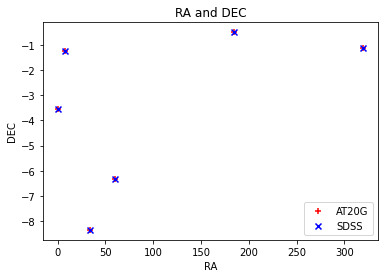

In [ ]:
plt.scatter(ra4,dec4,color='red',marker='+',label='AT20G')
plt.scatter(ra5,dec5,color='blue',marker='x',label='SDSS')
plt.title('RA and DEC')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend()
plt.savefig('/content/drive/Shareddrives/MSc 1 Sem 2/Astronomy and Astrophysics/SDSSxat20g.png', dpi=300)

# SuperXAT20G

Importing Data and Cross Matching

In [ ]:
og=[id1,reference_points,bmag]=import_superfull(5000000)
og1=[id2,query_points,flux20hz,flux8hz]=import_at20g()

r_new3,q_new3,dist3=KD_CM(reference_points,query_points,1)

Time taken for KD:  47.34911562599882


Creating New Catalogue

In [ ]:
ra1=[]                  
dec1=[]
flux=[]
k=[]
k1=1

for j in r_new3:
  for i in og[1]:
    if i==j:  
      (ra,dec)=og[1] [og[1].index(i)]
      f=og[2][og[1].index(i)]
      ra1.append(ra)
      dec1.append(dec)
      flux.append(f)
      k.append(k1)
      k1+=1

ra2=[]
dec2=[]
bmag=[]
for j in q_new3:
  for i in og1[1]:
    if i==j:     
      (r,d)=og1[1][og1[1].index(i)]
      bmag1=og1[2][og1[1].index(i)]
      ra2.append(r)
      dec2.append(d)
      bmag.append(bmag1)
  
catal=[k,ra1,dec1,ra2,dec2,flux,bmag]
cat_dict={'index':k,'ra1':ra1,'dec1':dec1,'ra2':ra2,'dec2':dec2,'flux':flux,'Bmag':bmag}

len(flux)

76

In [ ]:
df2=pd.DataFrame(cat_dict)
df2.to_csv("/content/drive/Shareddrives/MSc 1 Sem 2/at20gxsuperfull.csv")
df2

Plot

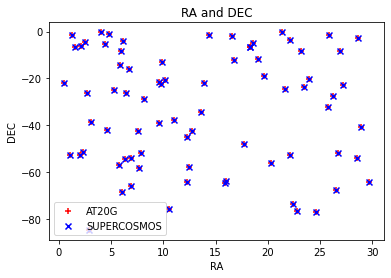

In [ ]:
plt.scatter(ra1,dec1,color='red',marker='+',label='AT20G')
plt.scatter(ra2,dec2,color='blue',marker='x',label='SUPERCOSMOS')
plt.title('RA and DEC')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend()
plt.savefig('/content/drive/Shareddrives/MSc 1 Sem 2/Astronomy and Astrophysics/RADEC.png', dpi=300)